In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [130]:
file_link = r"C:\Users\ASUS\Desktop\Python\Practise\BankChurners.csv"

In [131]:
df = pd.read_csv (file_link)
df.head().style.set_properties(**{"background-color": "#54BAB9","color": "black",
                                     "border-color": "black","font-size":"10pt",'width': 200})

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000,0.000022,0.999980


### DATA PROCESSING

In [ ]:
df.info()

In [133]:
#df.isnull().sum()

##### không có dữ liệu null trong dataset

In [134]:
df['CLIENTNUM'].duplicated().sum()

0

### EDA

In [135]:
df = df.drop (columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',\
     "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],)

In [136]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [137]:
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

In [138]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### Categorical variables

In [139]:
fig1 = px.histogram (df, x = df['Gender'], width = 600, height = 300, color ='Attrition_Flag')
fig1.show()



In [140]:
fig2 = px.histogram (df, x = df['Education_Level'], width = 600, height = 300, color ='Attrition_Flag')
fig2.show()

In [141]:
fig3 = px.histogram (df, x = df['Marital_Status'], width = 600, height = 300, color ='Attrition_Flag')
fig3.show()

In [142]:
fig4 = px.histogram (df, x = df['Income_Category'], width = 600, height = 300, color ='Attrition_Flag')
fig4.show()

In [143]:
fig5 = px.histogram (df, x = df['Card_Category'], width = 600, height = 300, color ='Attrition_Flag')
fig5.show()

In [144]:
df['Card_Category'].value_counts()


Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

### Numerical variables

In [145]:
def plot (data, x):
    #x = using_data[x]
    plot = px.histogram (data, x, title ="Distribution of {}".format(x),  width = 500,\
     height = 300, color ='Attrition_Flag')
    x = data[x]
    margin = dict (l=10, r=10, t = 10, b = 10)
    plot.show()
    #title = "Distribution of {}".format(x)
    #title = 'Distribution of {}'.format(x)
    #plot_object.set_title(title)

In [146]:
plot (data = df, x = 'Customer_Age')

In [147]:
correl = df.corr()

In [148]:
correl

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,-0.046430,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Attrition_Flag,-0.046430,1.000000,0.018203,0.018991,0.013687,-0.150005,0.152449,0.204491,-0.023873,-0.263053,-0.000285,-0.131063,-0.168598,-0.371403,-0.290054,-0.178410
Customer_Age,0.007613,0.018203,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,0.018991,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.013687,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.150005,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.152449,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,0.204491,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,-0.023873,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,-0.263053,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022


In [149]:
correl_heatmap = px.imshow (correl, width = 1000, height = 600) #text_auto=True: nó điền text vào bên trong các ô
correl_heatmap.update_layout(margin=dict(l=20, r=20, t=20, b=20))
correl_heatmap.show()

* Không thấy rõ ràng lắm các tương quan
* Một số variables nổi bật:
> Total_Trans_Ct (negative correl)
>> Total_Ct_Chng_Q4_Q1 (negative correl)

In [150]:
df["Attrition_Flag"].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [151]:
### Check hiện tượng imbalance data
imbalance_data = px.pie(df, values=df["Attrition_Flag"].value_counts(),
    title='Imbalance in Target Feature', names=df["Attrition_Flag"].unique())
imbalance_data.show()

dữ liệu có imbalance ở mức vừa phải

### Dummy variables

In [152]:
dummy_cols = df.select_dtypes("object")
dummy_cols
for i in list (dummy_cols):
    dummy_vals = pd.get_dummies (df[i])
    df = pd.concat ([df, dummy_vals], axis = 1)
    df.drop (columns = [i], inplace = True)


In [153]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,Blue,Gold,Platinum,Silver
0,768805383,0,45,3,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,818770008,0,49,5,44,6,1,2,8256.0,864,...,0,0,0,0,1,0,1,0,0,0
2,713982108,0,51,3,36,4,1,0,3418.0,0,...,0,0,0,1,0,0,1,0,0,0
3,769911858,0,40,4,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
4,709106358,0,40,3,21,5,1,0,4716.0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,2,40,3,2,3,4003.0,1851,...,0,1,0,0,0,0,1,0,0,0
10123,710638233,1,41,2,25,4,2,3,4277.0,2186,...,0,1,0,0,0,0,1,0,0,0
10124,716506083,1,44,1,36,5,3,4,5409.0,0,...,0,0,0,0,1,0,1,0,0,0
10125,717406983,1,30,2,36,4,3,3,5281.0,0,...,0,1,0,0,0,0,1,0,0,0


In [154]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [155]:
col_min_max_scaler = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
            'Avg_Utilization_Ratio']

In [156]:
df['Customer_Age'].dtypes

dtype('int64')

In [157]:
x_data = scaler.fit_transform (df[col_min_max_scaler])

In [158]:
x_data

array([[0.40425532, 0.6       , 0.60465116, ..., 0.24806202, 0.43753366,
        0.06106106],
       [0.4893617 , 1.        , 0.72093023, ..., 0.17829457, 1.        ,
        0.10510511],
       [0.53191489, 0.6       , 0.53488372, ..., 0.07751938, 0.6281637 ,
        0.        ],
       ...,
       [0.38297872, 0.2       , 0.53488372, ..., 0.3875969 , 0.22024771,
        0.        ],
       [0.08510638, 0.4       , 0.53488372, ..., 0.40310078, 0.19439957,
        0.        ],
       [0.36170213, 0.4       , 0.27906977, ..., 0.39534884, 0.17474421,
        0.18918919]])

In [159]:
from sklearn.model_selection import train_test_split 
x_data = df.drop (columns = ['Attrition_Flag'])
y_data = df['Attrition_Flag']
X_train, x_test, y_train, y_test = train_test_split (x_data, y_data, test_size= 0.2)

In [160]:
#fix imbalance data ở trên
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 69, sampling_strategy = 1.0)

X_train, y_train = sm.fit_resample(X_train, y_train)

##### SMOTE
Là phương pháp oversampling mẫu ở class thiểu số

### Tìm model

In [161]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [162]:
y_hat = logreg.predict (x_test)

In [163]:
y_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [164]:
y_test.values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

A confusion matrix is a technique for summarizing the performance of a classification algorithm.
> The confusion matrix shows the ways in which your classification model is confused when it makes predictions.

In [168]:
from sklearn.metrics import confusion_matrix


In [169]:
cfm = confusion_matrix(y_true=y_test, y_pred=y_hat)

In [170]:
TP = cfm[0][0]
FN = cfm[0][1]
FP = cfm[1][0]
TN = cfm[1][1]

* Accuracy: tỉ lệ phát hiện đúng (Positive/Negative)
* Precision: the trustiness percentage of the model when it says that a sample is Positive is Precision
* Recall cao: phân loại Positive thành Positive cao. When the model classifies all the positive samples as Positive, then the recall will be 100% even if all the negative samples were incorrectly classified as Positive

In [171]:
print("Accuracy :", (TP+TN)/(TP+TN+FP+FN))
print("Precision :", (TP)/(TP+FP))
print("Recall :", (TP)/(TP+FN))

Accuracy : 0.8282329713721619
Precision : 0.8282329713721619
Recall : 1.0


mô hình này có thể phát hiện mẫu positive tốt

chỉ số AUC càng gần 1 thì mô hình càng phân loại chính xác. AUC càng gần 0.5 thì hiệu suất phân loại càng tệ còn nếu gần 0 thì mô hình sẽ phân loại ngược kết quả (phân loại dương tính thành âm tính và ngược lại)

In [172]:
import scikitplot as skplt

In [173]:
y_true = y_test # ground truth labels
y_probas = logreg.predict_proba(x_test)

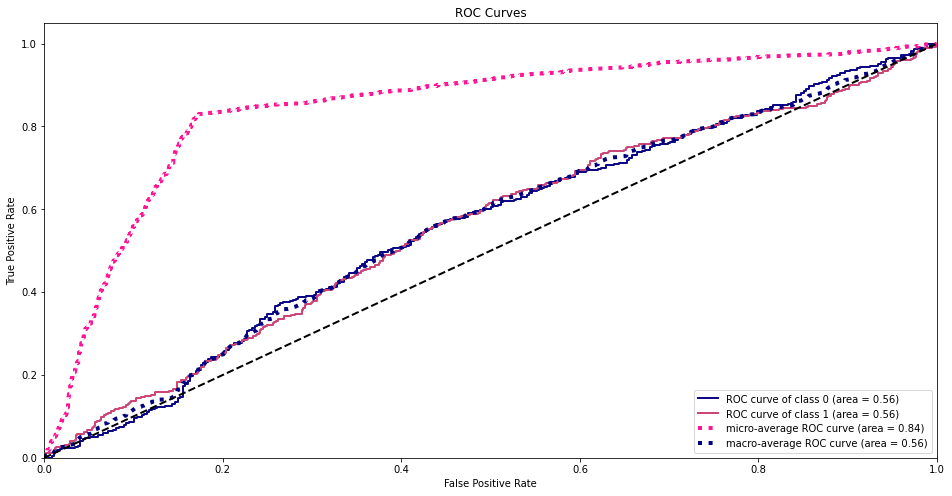

In [174]:
skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), cmap='plasma')
plt.show()

In [175]:
from sklearn.metrics import auc 
from sklearn.metrics import roc_curve

In [ ]:
print ("AUC is", auc (fpr, tpr))

AUC is 0.5


##### Không phù hợp 

### Xgb_model

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=69, use_label_encoder=False, n_jobs=-1)

In [ ]:
xgb_model.fit(np.array (X_train), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=69,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
xgb_model.score(x_test, y_test)

0.9644619940769991

#### Evaluate model

In [184]:
y_hat = xgb_model.predict(x_test)

In [185]:
cfm = confusion_matrix(y_true=y_test, y_pred=y_hat)

In [186]:
TP = cfm[0][0]
FN = cfm[0][1]
FP = cfm[1][0]
TN = cfm[1][1]

In [187]:
print("Accuracy :", (TP+TN)/(TP+TN+FP+FN))
print("Precision :", (TP)/(TP+FP))
print("Recall :", (TP)/(TP+FN))

Accuracy : 0.9921026653504442
Precision : 0.9946428571428572
Recall : 0.9958283671036948


In [188]:
y_true = y_test # ground truth labels
y_probas = xgb_model.predict_proba(x_test)

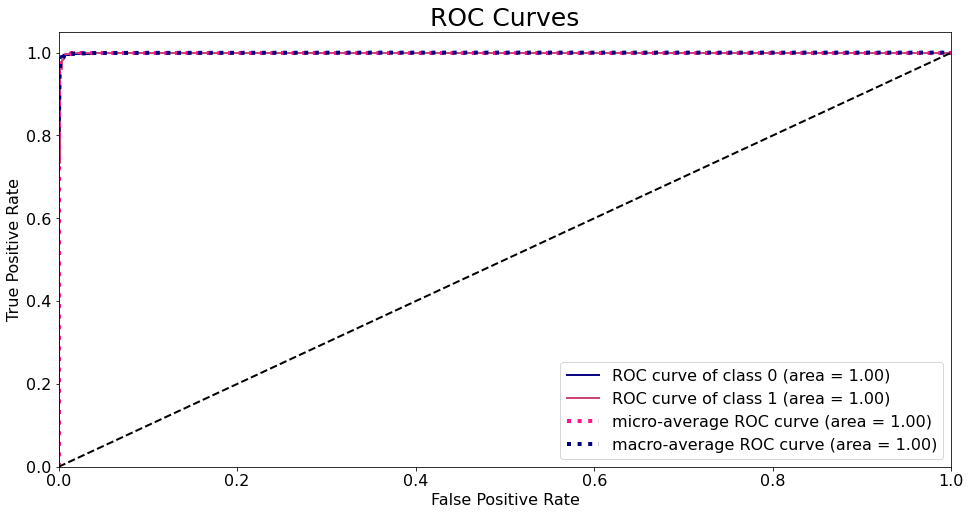

In [189]:
skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
plt.grid(False)
plt.show()

In [190]:
fpr, tpr, threshold = roc_curve (y_test, y_hat)

In [191]:
print ("AUC is", auc (fpr, tpr))

AUC is 0.9849831490690887
